In [1]:
import json
import re

import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배_naver_news_1000.json'
    
f = open(openFileName, 'r', encoding='utf-8').read()

jsonData = json.loads(f)
data = ''

for item in jsonData:
    if 'description' in item.keys():
        data = data + re.sub(r'[^\w]', ' ', item['description']) + ' '

In [3]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(data)

In [4]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [5]:
print(X)

  (0, 345)	1
  (1, 204)	1
  (2, 1997)	1
  (3, 976)	1
  (4, 248)	1
  (5, 1121)	1
  (6, 183)	1
  (7, 2242)	1
  (8, 204)	1
  (9, 1348)	1
  (10, 260)	1
  (11, 1729)	1
  (12, 2317)	1
  (13, 1799)	1
  (14, 210)	1
  (15, 334)	1
  (16, 1348)	1
  (17, 928)	1
  (18, 1348)	1
  (19, 1935)	1
  (20, 1875)	1
  (21, 1348)	1
  (22, 115)	1
  (23, 2265)	1
  (24, 2242)	1
  :	:
  (20447, 1060)	1
  (20448, 1766)	1
  (20449, 1902)	1
  (20450, 713)	1
  (20451, 1484)	1
  (20452, 1183)	1
  (20453, 1527)	1
  (20454, 233)	1
  (20455, 573)	1
  (20456, 1729)	1
  (20457, 462)	1
  (20458, 235)	1
  (20459, 2326)	1
  (20460, 1766)	1
  (20461, 1537)	1
  (20462, 233)	1
  (20463, 1726)	1
  (20464, 1900)	1
  (20465, 2031)	1
  (20466, 2294)	1
  (20467, 1986)	1
  (20468, 1876)	1
  (20469, 989)	1
  (20470, 1537)	1
  (20471, 1766)	1


In [6]:
print(vectorize.vocabulary_)

{'김대': 345, '과학': 204, '총괄': 1997, '상무': 976, '국제': 248, '수준': 1121, '공신': 183, '필립모리스': 2242, '연구': 1348, '궐련': 260, '전자담배': 1729, '혁신': 2317, '제품': 1799, '관련': 210, '기초': 334, '비임': 928, '진행': 1935, '중이': 1875, '결과': 115, '한국': 2265, '박사': 744, '기기': 300, '아이': 1254, '코스': 2088, '전용': 1723, '담배': 442, '히츠': 2417, '바탕': 740, '커뮤니케이션': 2070, '정일우': 1771, '엠게임': 1326, '관계자': 208, '진동': 1925, '모터': 669, '공급': 174, '물량': 708, '증가': 1885, '매출': 626, '지난해': 1902, '업계': 1311, '글로벌': 279, '기업': 317, '이번': 1530, '사업': 948, '투자': 2147, '회사': 2391, '중국': 1863, '패션': 2182, '디자인': 543, '생산': 1004, '아마존': 1247, '통해': 2145, '미국': 713, '소비자': 1087, '판매': 2174, '전자': 1728, '대부분': 464, '다른': 421, '계기': 142, '자사': 1642, '근간': 277, '강화': 67, '서울대학교': 1017, '의대': 1500, '대학원': 487, '내과학': 376, '석사': 1022, '등장': 538, '시장': 1179, '지각': 1896, '변동': 815, '일어나고': 1602, '이어진': 1539, '출시': 2034, '상형': 993, '다시': 427, '주목': 1840, '전동': 1707, '확대': 2369, '적자': 1694, '한빛소프트': 2269, '실적': 1226, '공개': 172, '영업': 1372,

In [7]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'김대': 26,
 '과학': 70,
 '총괄': 31,
 '상무': 33,
 '국제': 7,
 '수준': 20,
 '공신': 6,
 '필립모리스': 194,
 '연구': 31,
 '궐련': 406,
 '전자담배': 1265,
 '혁신': 19,
 '제품': 114,
 '관련': 33,
 '기초': 6,
 '비임': 6,
 '진행': 20,
 '중이': 8,
 '결과': 52,
 '한국': 177,
 '박사': 24,
 '기기': 88,
 '아이': 164,
 '코스': 160,
 '전용': 133,
 '담배': 579,
 '히츠': 29,
 '바탕': 6,
 '커뮤니케이션': 28,
 '정일우': 3,
 '엠게임': 8,
 '관계자': 31,
 '진동': 20,
 '모터': 22,
 '공급': 33,
 '물량': 19,
 '증가': 74,
 '매출': 90,
 '지난해': 83,
 '업계': 43,
 '글로벌': 35,
 '기업': 17,
 '이번': 36,
 '사업': 71,
 '투자': 34,
 '회사': 30,
 '중국': 43,
 '패션': 2,
 '디자인': 6,
 '생산': 35,
 '아마존': 1,
 '통해': 36,
 '미국': 236,
 '소비자': 14,
 '판매': 197,
 '전자': 79,
 '대부분': 22,
 '다른': 11,
 '계기': 23,
 '자사': 3,
 '근간': 28,
 '강화': 31,
 '서울대학교': 17,
 '의대': 22,
 '대학원': 17,
 '내과학': 11,
 '석사': 7,
 '등장': 7,
 '시장': 170,
 '지각': 2,
 '변동': 3,
 '일어나고': 2,
 '이어진': 1,
 '출시': 158,
 '상형': 69,
 '다시': 18,
 '주목': 14,
 '전동': 1,
 '확대': 53,
 '적자': 5,
 '한빛소프트': 1,
 '실적': 53,
 '공개': 32,
 '영업': 40,
 '이익': 46,
 '순이익': 4,
 '창유': 1,
 '방침': 13,
 '사진': 22,


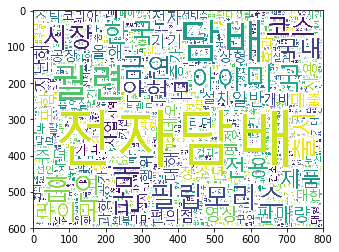

In [10]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [11]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'김대': 345, '과학': 204, '총괄': 1997, '상무': 976, '국제': 248, '수준': 1121, '공신': 183, '필립모리스': 2242, '연구': 1348, '궐련': 260, '전자담배': 1729, '혁신': 2317, '제품': 1799, '관련': 210, '기초': 334, '비임': 928, '진행': 1935, '중이': 1875, '결과': 115, '한국': 2265, '박사': 744, '기기': 300, '아이': 1254, '코스': 2088, '전용': 1723, '담배': 442, '히츠': 2417, '바탕': 740, '커뮤니케이션': 2070, '정일우': 1771, '엠게임': 1326, '관계자': 208, '진동': 1925, '모터': 669, '공급': 174, '물량': 708, '증가': 1885, '매출': 626, '지난해': 1902, '업계': 1311, '글로벌': 279, '기업': 317, '이번': 1530, '사업': 948, '투자': 2147, '회사': 2391, '중국': 1863, '패션': 2182, '디자인': 543, '생산': 1004, '아마존': 1247, '통해': 2145, '미국': 713, '소비자': 1087, '판매': 2174, '전자': 1728, '대부분': 464, '다른': 421, '계기': 142, '자사': 1642, '근간': 277, '강화': 67, '서울대학교': 1017, '의대': 1500, '대학원': 487, '내과학': 376, '석사': 1022, '등장': 538, '시장': 1179, '지각': 1896, '변동': 815, '일어나고': 1602, '이어진': 1539, '출시': 2034, '상형': 993, '다시': 427, '주목': 1840, '전동': 1707, '확대': 2369, '적자': 1694, '한빛소프트': 2269, '실적': 1226, '공개': 172, '영업': 1372,

In [12]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('전자담배', 1265.0)
('담배', 579.0)
('궐련', 406.0)
('미국', 236.0)
('흡연', 234.0)
('판매', 197.0)
('필립모리스', 194.0)
('한국', 177.0)
('금연', 176.0)
('시장', 170.0)
('아이', 164.0)
('코스', 160.0)
('출시', 158.0)
('안현모', 146.0)
('전용', 133.0)
('국내', 129.0)
('라이머', 118.0)
('제품', 114.0)
('판매량', 114.0)
('영상', 103.0)
('일반', 100.0)
('주년', 99.0)
('매출', 90.0)
('올해', 89.0)
('기기', 88.0)
('포함', 86.0)
('대해', 85.0)
('지난해', 83.0)
('사용', 83.0)
('편의점', 80.0)
('청소년', 80.0)
('전자', 79.0)
('네오', 75.0)
('증가', 74.0)
('설치', 74.0)
('예정', 72.0)
('행위', 72.0)
('사업', 71.0)
('과학', 70.0)
('효과', 70.0)
('대한', 70.0)
('상형', 69.0)
('개비', 67.0)
('공간', 67.0)
('스틱', 66.0)
('공장', 66.0)
('코리아', 65.0)
('배달', 64.0)
('기념', 63.0)
('라며', 63.0)
('점유', 63.0)
('흡연실', 63.0)
('대마', 61.0)
('수출', 60.0)
('브랜드', 57.0)
('상승', 57.0)
('남편', 56.0)
('구역', 56.0)
('확대', 53.0)
('실적', 53.0)
('결과', 52.0)
('눈물', 51.0)
('최근', 51.0)
('기자', 51.0)
('지역', 51.0)
('회복', 50.0)
('선언', 49.0)
('기간', 49.0)
('대형', 49.0)
('위해', 48.0)
('지난', 48.0)
('기대', 47.0)
('서비스', 47.0)
('이익', 46.0)
(

('득표수', 1.0)
('우승', 1.0)
('마지막', 1.0)
('편이', 1.0)
('번꼴', 1.0)
('전혀', 1.0)
('고치', 1.0)
('손톱', 1.0)
('물어', 1.0)
('순간', 1.0)
('항변', 1.0)
('배기', 1.0)
('걱정', 1.0)
('딸도', 1.0)
('제발', 1.0)
('고정훈', 1.0)
('전달', 1.0)
('양성', 1.0)
('호기심', 1.0)
('최고급', 1.0)
('시행', 1.0)
('잡기', 1.0)
('결의', 1.0)
('네이버', 1.0)
('대전', 1.0)
('나라', 1.0)
('전시회', 1.0)
('외국인', 1.0)
('삼지', 1.0)
('눈치', 1.0)
('매우', 1.0)
('정소라', 1.0)
('환경범죄', 1.0)
('꼼짝', 1.0)
('포렌식', 1.0)
('사범', 1.0)
('과천', 1.0)
('이희승', 1.0)
('역량', 1.0)
('효율', 1.0)
('입지', 1.0)
('개척', 1.0)
('사활', 1.0)
('당분간', 1.0)
('급성', 1.0)
('탄력', 1.0)
('조지아주', 1.0)
('통제', 1.0)
('이중', 1.0)
('하량', 1.0)
('지용', 1.0)
('금도', 1.0)
('국세', 1.0)
('부족', 1.0)
('징후', 1.0)
('노사', 1.0)
('간의', 1.0)
('소통', 1.0)
('강주현', 1.0)
('입력', 1.0)
('스카', 1.0)
('사랑', 1.0)
('통계', 1.0)
('국정', 1.0)
('신문', 1.0)
('비판', 1.0)
('이탈', 1.0)
('반출량', 1.0)
('윈윈', 1.0)
('점차', 1.0)
('둔화', 1.0)
('뚜렷', 1.0)
('수치', 1.0)
('대폭', 1.0)
('시중', 1.0)
('가량', 1.0)
('고공', 1.0)
('행진', 1.0)
('양상', 1.0)
('사천', 1.0)
('노동조합', 1.0)
('세종', 1

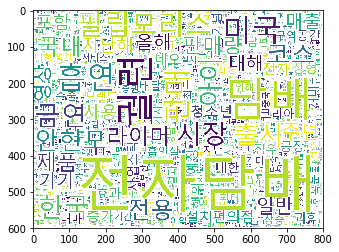

In [13]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')